# Part 1 - Tensor Basics 

In [5]:
import torch

x = torch.empty(2,2,3) # 3 Boyut
print(x)

x = torch.rand(5, 3)
print(x)

x = torch.zeros(5, 3)
print(x)

print(x.size())

x = torch.tensor([5.5, 3])
print(x.size())

tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])
tensor([[0.3044, 0.1265, 0.1011],
        [0.8941, 0.0776, 0.7323],
        [0.7688, 0.9143, 0.4347],
        [0.6913, 0.9917, 0.9082],
        [0.5118, 0.4954, 0.3351]])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.Size([5, 3])
torch.Size([2])


In [8]:
x = torch.rand(5, 3)

print(x[:, 0]) 
print(x[1, :]) 
print(x[1,1]) 

tensor([0.1670, 0.3968, 0.3123, 0.0485, 0.5527])
tensor([0.3968, 0.4470, 0.2029])
tensor(0.4470)


In [9]:
print(x[1,1].item())# item tensor yerine değer olarak getirir

0.4469681978225708


In [10]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8) #yeniden boyutlandırma işlemi
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


# Part 2 - Gradient Calculation With Autograd

In [11]:
import torch

x = torch.randn(3, requires_grad=True)
y = x + 2

print(x)
print(y)
print(y.grad_fn)

z = y * y * 3
print(z)
z = z.mean()
print(z)

z.backward()
print(x.grad) # dz/dx #türevini alır

tensor([ 0.3278, -0.2918, -1.1226], requires_grad=True)
tensor([2.3278, 1.7082, 0.8774], grad_fn=<AddBackward0>)
tensor([16.2566,  8.7536,  2.3093], grad_fn=<MulBackward0>)
tensor(9.1065, grad_fn=<MeanBackward0>)
tensor([4.6557, 3.4163, 1.7547])


In [12]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
    model_output = (weights*3).sum()
    model_output.backward()#türevi sonucu 
    
    print(weights.grad)

    with torch.no_grad():
        weights -= 0.1 * weights.grad# ağırlıkları değiştiriyorz

    weights.grad.zero_()#sonraki epochta gradyan 0 dan başlatırız

print(weights)
print(model_output)

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([0.1000, 0.1000, 0.1000, 0.1000], requires_grad=True)
tensor(4.8000, grad_fn=<SumBackward0>)


# Part 3 - Backpropagation 

In [13]:
import torch

x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True)


y_predicted = w * x
loss = (y_predicted - y)**2# loss fonksiyonumuz
print(loss)

loss.backward() # loss ile gradyan hesaplanır
print(w.grad)


with torch.no_grad():
    w -= 0.01 * w.grad# 
w.grad.zero_()


tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


tensor(0.)

# Part 4 - Gradient Descent with Autograd and Backpropagation


In [14]:
#hepsi manuel 
import numpy as np 

X = np.array([1, 2, 3, 4], dtype=np.float32)
Y = np.array([2, 4, 6, 8], dtype=np.float32)

w = 0.0


def forward(x):
    return w * x

def loss(y, y_pred):#loss fonksiyonumuz mse
    return ((y_pred - y)**2).mean()

def gradient(x, y, y_pred):
    return np.dot(2*x, y_pred - y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')


Prediction before training: f(5) = 0.000


In [15]:
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
    # predict = forward pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)
    
    # calculate gradients
    dw = gradient(X, Y, y_pred)#gradyan inişi manual

    # update weights
    w -= learning_rate * dw # türevle birlikte ağırlıklar değiştirildi

    if epoch % 2 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')
     
print(f'Prediction after training: f(5) = {forward(5):.3f}')

epoch 1: w = 1.200, loss = 30.00000000
epoch 3: w = 1.872, loss = 0.76800019
epoch 5: w = 1.980, loss = 0.01966083
epoch 7: w = 1.997, loss = 0.00050332
epoch 9: w = 1.999, loss = 0.00001288
epoch 11: w = 2.000, loss = 0.00000033
epoch 13: w = 2.000, loss = 0.00000001
epoch 15: w = 2.000, loss = 0.00000000
epoch 17: w = 2.000, loss = 0.00000000
epoch 19: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


In [16]:
#gradyan inişi hariç manuel 
import torch

X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

def forward(x):
    return w * x

def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

print(f'Prediction before training: f(5) = {forward(5).item():.3f}')

Prediction before training: f(5) = 0.000


In [17]:
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    y_pred = forward(X)

    l = loss(Y, y_pred)

    l.backward()#öncekine bakarak direkt backward ile hesaplandı


    with torch.no_grad():
        w -= learning_rate * w.grad 
    
    w.grad.zero_()

    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.8f}')

print(f'Prediction after training: f(5) = {forward(5).item():.3f}')

epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training: f(5) = 10.000


# Part 5 - Training Pipeline: Model, Loss, and Optimizer

In [18]:
import torch
import torch.nn as nn

X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

def forward(x):#fakat model kendimizin
    return w * x

print(f'Prediction before training: f(5) = {forward(5).item():.3f}')


learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
#optimizer'a ağırlık ve lr verilir
optimizer = torch.optim.SGD([w], lr=learning_rate)#optimizer ve loss pytorch kütüphanesinden

Prediction before training: f(5) = 0.000


In [19]:

for epoch in range(n_iters):

    y_predicted = forward(X)

    l = loss(Y, y_predicted)

    l.backward()

    optimizer.step()#optimizer step ile tek satırda ağırlıkları değiştirir

    optimizer.zero_grad()

    if epoch % 10 == 0:
        print('epoch ', epoch+1, ': w = ', w, ' loss = ', l)

print(f'Prediction after training: f(5) = {forward(5).item():.3f}')

epoch  1 : w =  tensor(0.3000, requires_grad=True)  loss =  tensor(30., grad_fn=<MseLossBackward>)
epoch  11 : w =  tensor(1.6653, requires_grad=True)  loss =  tensor(1.1628, grad_fn=<MseLossBackward>)
epoch  21 : w =  tensor(1.9341, requires_grad=True)  loss =  tensor(0.0451, grad_fn=<MseLossBackward>)
epoch  31 : w =  tensor(1.9870, requires_grad=True)  loss =  tensor(0.0017, grad_fn=<MseLossBackward>)
epoch  41 : w =  tensor(1.9974, requires_grad=True)  loss =  tensor(6.7705e-05, grad_fn=<MseLossBackward>)
epoch  51 : w =  tensor(1.9995, requires_grad=True)  loss =  tensor(2.6244e-06, grad_fn=<MseLossBackward>)
epoch  61 : w =  tensor(1.9999, requires_grad=True)  loss =  tensor(1.0176e-07, grad_fn=<MseLossBackward>)
epoch  71 : w =  tensor(2.0000, requires_grad=True)  loss =  tensor(3.9742e-09, grad_fn=<MseLossBackward>)
epoch  81 : w =  tensor(2.0000, requires_grad=True)  loss =  tensor(1.4670e-10, grad_fn=<MseLossBackward>)
epoch  91 : w =  tensor(2.0000, requires_grad=True)  loss

In [20]:
#herşey hazır fonksiyonlarla

import torch
import torch.nn as nn

X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

n_samples, n_features = X.shape
print(f'#samples: {n_samples}, #features: {n_features}')

X_test = torch.tensor([5], dtype=torch.float32)


input_size = n_features
output_size = n_features

model = nn.Linear(input_size, output_size)# nn ile oluşturduğumuz ağımız giriş ve çıkış boyutları ister

'''model sınıflarımız 
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define diferent layers
        self.lin = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        return self.lin(x)
model = LinearRegression(input_size, output_size)
'''

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


#samples: 4, #features: 1
Prediction before training: f(5) = 4.691


In [22]:
for epoch in range(n_iters):
    
    y_predicted = model(X)

    l = loss(Y, y_predicted)

    l.backward()

    optimizer.step()

    optimizer.zero_grad()

    if epoch % 10 == 0:
        [w, b] = model.parameters()
        print('epoch ', epoch+1, ': w = ', w[0][0].item(), ' loss = ', l)

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

epoch  1 : w =  1.6918669939041138  loss =  tensor(0.1379, grad_fn=<MseLossBackward>)
epoch  11 : w =  1.7009689807891846  loss =  tensor(0.1299, grad_fn=<MseLossBackward>)
epoch  21 : w =  1.7098019123077393  loss =  tensor(0.1223, grad_fn=<MseLossBackward>)
epoch  31 : w =  1.7183740139007568  loss =  tensor(0.1152, grad_fn=<MseLossBackward>)
epoch  41 : w =  1.7266931533813477  loss =  tensor(0.1085, grad_fn=<MseLossBackward>)
epoch  51 : w =  1.7347661256790161  loss =  tensor(0.1022, grad_fn=<MseLossBackward>)
epoch  61 : w =  1.742600917816162  loss =  tensor(0.0962, grad_fn=<MseLossBackward>)
epoch  71 : w =  1.750204086303711  loss =  tensor(0.0906, grad_fn=<MseLossBackward>)
epoch  81 : w =  1.7575829029083252  loss =  tensor(0.0854, grad_fn=<MseLossBackward>)
epoch  91 : w =  1.7647438049316406  loss =  tensor(0.0804, grad_fn=<MseLossBackward>)
Prediction after training: f(5) = 9.528


# Part 6 - Linear Regression

In [23]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)# kendi veri setimizi oluşturduk

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape


input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)#modeli oluşturduk

#optimizer ve loss fonksiyonu tanımladık
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  


epoch: 10, loss = 4035.2368
epoch: 20, loss = 2844.2883
epoch: 30, loss = 2032.4222
epoch: 40, loss = 1478.8562
epoch: 50, loss = 1101.3325
epoch: 60, loss = 843.8139
epoch: 70, loss = 668.1188
epoch: 80, loss = 548.2255
epoch: 90, loss = 466.3951
epoch: 100, loss = 410.5335


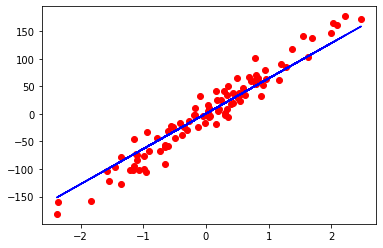

In [24]:
#model eğitim süreci
num_epochs = 100
for epoch in range(num_epochs):
    #ileri yayılım
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # geri yayılım
    loss.backward()
    optimizer.step()

    #gradyanları temizler
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

# Part 7 - Logistic Regression

In [32]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#datamızı çekip x ve y değerlerine atadık
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape # X giriş ve kaç adet örnek olduğunu verdik

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


sc = StandardScaler() #verileri belirli bir aralığa getirdik
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)



In [33]:
#modelimizin sınıfını tanımladık n giriş 1 çıkıştan oluşur ve çıkıştan sonra sigmoid fonksiyondan geçer bu modelimizi logistic regressiona dönüştürür
class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Model(n_features)

In [35]:
num_epochs = 100
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)#modelin parametrelerini çekeriz


for epoch in range(num_epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    loss.backward()
    optimizer.step()

    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


with torch.no_grad():#bu alanda gradyan değerleri deactive olur
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy: {acc.item():.4f}')

epoch: 10, loss = 0.5935
epoch: 20, loss = 0.4926
epoch: 30, loss = 0.4288
epoch: 40, loss = 0.3846
epoch: 50, loss = 0.3517
epoch: 60, loss = 0.3260
epoch: 70, loss = 0.3052
epoch: 80, loss = 0.2879
epoch: 90, loss = 0.2733
epoch: 100, loss = 0.2607
accuracy: 0.8947


# Part 8 - Dataset and DataLoader - Batch Training

In [47]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

#dataloader ile batch trainingde her bir sample sonucu ağırlıkları güncellemek makineyi yorucağından dolayı
#belirli boyutlardaki batchlerin değerlerine göre ağırlıkları güncellemek daha doğrudur bundan dolayı dataloader kullanılır

class WineDataset(Dataset):

    def __init__(self):
        xy = np.loadtxt('./data/wines.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples = xy.shape[0]

        self.x_data = torch.from_numpy(xy[:, 1:])
        self.y_data = torch.from_numpy(xy[:, [0]])

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.n_samples


dataset = WineDataset()

first_data = dataset[0]
features, labels = first_data
print(features, labels)

train_loader = DataLoader(dataset=dataset,
                          batch_size=4,
                          shuffle=True,
                          num_workers=4)


tensor([3.5100, 0.7000, 9.4000]) tensor([5.])


# Part 9 - Dataset Transforms

In [49]:
import torch
import torchvision
from torch.utils.data import Dataset
import numpy as np


class WineDataset(Dataset):

    def __init__(self, transform=None):
        xy = np.loadtxt('./data/wines.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples = xy.shape[0]

        # note that we do not convert to tensor here
        self.x_data = xy[:, 1:]
        self.y_data = xy[:, [0]]

        self.transform = transform

    def __getitem__(self, index):
        sample = self.x_data[index], self.y_data[index]

        if self.transform:
            sample = self.transform(sample)

        return sample

    def __len__(self):
        return self.n_samples


class ToTensor:
    def __call__(self, sample):
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)

class MulTransform:
    def __init__(self, factor):
        self.factor = factor

    def __call__(self, sample):
        inputs, targets = sample
        inputs *= self.factor
        return inputs, targets

print('Without Transform')
dataset = WineDataset()
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)

print('\nWith Tensor Transform')
dataset = WineDataset(transform=ToTensor())
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)

print('\nWith Tensor and Multiplication Transform')
composed = torchvision.transforms.Compose([ToTensor(), MulTransform(4)])
dataset = WineDataset(transform=composed)
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)

Without Transform
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[3.51 0.7  9.4 ] [5.]

With Tensor Transform
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([3.5100, 0.7000, 9.4000]) tensor([5.])

With Tensor and Multiplication Transform
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([14.0400,  2.8000, 37.6000]) tensor([5.])


# Part 10 - Softmax and Cross Entropy

In [50]:
import torch
import torch.nn as nn
import numpy as np

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print('softmax numpy:', outputs)

x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0) # along values along first axis
print('softmax torch:', outputs)


def cross_entropy(actual, predicted):
    EPS = 1e-15
    predicted = np.clip(predicted, EPS, 1 - EPS)
    loss = -np.sum(actual * np.log(predicted))
    return loss # / float(predicted.shape[0])


Y = np.array([1, 0, 0])
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])

l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)

print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss2 numpy: {l2:.4f}')


softmax numpy: [0.65900114 0.24243297 0.09856589]
softmax torch: tensor([0.6590, 0.2424, 0.0986])
Loss1 numpy: 0.3567
Loss2 numpy: 2.3026


In [51]:
loss = nn.CrossEntropyLoss()

Y = torch.tensor([0])

Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]])
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])
l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(f'PyTorch Loss1: {l1.item():.4f}')
print(f'PyTorch Loss2: {l2.item():.4f}')

_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(f'Actual class: {Y.item()}, Y_pred1: {predictions1.item()}, Y_pred2: {predictions2.item()}')


PyTorch Loss1: 0.4170
PyTorch Loss2: 1.8406
Actual class: 0, Y_pred1: 0, Y_pred2: 1


In [52]:
Y = torch.tensor([2, 0, 1])

Y_pred_good = torch.tensor(
    [[0.1, 0.2, 3.9],
    [1.2, 0.1, 0.3], 
    [0.3, 2.2, 0.2]]) 

Y_pred_bad = torch.tensor(
    [[0.9, 0.2, 0.1],
    [0.1, 0.3, 1.5],
    [1.2, 0.2, 0.5]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
print(f'Batch Loss1:  {l1.item():.4f}')
print(f'Batch Loss2: {l2.item():.4f}')

_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)
print(f'Actual class: {Y}, Y_pred1: {predictions1}, Y_pred2: {predictions2}')


Batch Loss1:  0.2834
Batch Loss2: 1.6418
Actual class: tensor([2, 0, 1]), Y_pred1: tensor([2, 0, 1]), Y_pred2: tensor([0, 2, 0])


In [54]:
class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet1, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)  
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        y_pred = torch.sigmoid(out)
        return y_pred

model = NeuralNet1(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss()

class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        return out

model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss() #cross entropy loss olduğundan sonuna softmax eklemeyiz bu fonksyionun içinde zaten var

# Part 12 - Activation Functions

In [55]:
import torch
import torch.nn as nn
import torch.nn.functional as F

x = torch.tensor([-1.0, 1.0, 2.0, 3.0])

# sofmax
output = torch.softmax(x, dim=0)
print(output)
sm = nn.Softmax(dim=0)
output = sm(x)
print(output)

# sigmoid 
output = torch.sigmoid(x)
print(output)
s = nn.Sigmoid()
output = s(x)
print(output)

#tanh
output = torch.tanh(x)
print(output)
t = nn.Tanh()
output = t(x)
print(output)

# relu
output = torch.relu(x)
print(output)
relu = nn.ReLU()
output = relu(x)
print(output)

# leaky relu
output = F.leaky_relu(x)
print(output)
lrelu = nn.LeakyReLU()
output = lrelu(x)
print(output)


tensor([0.0120, 0.0889, 0.2418, 0.6572])
tensor([0.0120, 0.0889, 0.2418, 0.6572])
tensor([0.2689, 0.7311, 0.8808, 0.9526])
tensor([0.2689, 0.7311, 0.8808, 0.9526])
tensor([-0.7616,  0.7616,  0.9640,  0.9951])
tensor([-0.7616,  0.7616,  0.9640,  0.9951])
tensor([0., 1., 2., 3.])
tensor([0., 1., 2., 3.])
tensor([-0.0100,  1.0000,  2.0000,  3.0000])
tensor([-0.0100,  1.0000,  2.0000,  3.0000])


In [56]:

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out

#init içinde tanımlamak yerine forwardda direkt yapılır
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        out = torch.relu(self.linear1(x))
        out = torch.sigmoid(self.linear2(out))
        return out

# Part 13 - Feed-Forward Neural Network

Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw
Processing...


C:\Users\Tolga\AppData\Roaming\Python\Python37\site-packages\torchvision\datasets\mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!






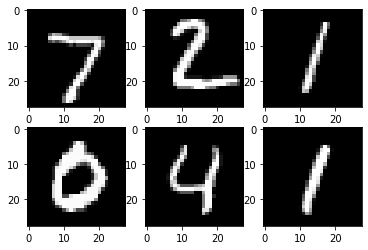

In [57]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

examples = iter(test_loader)
example_data, example_targets = examples.next()

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()


In [58]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/2], Step [100/600], Loss: 0.4187
Epoch [1/2], Step [200/600], Loss: 0.2418
Epoch [1/2], Step [300/600], Loss: 0.1670
Epoch [1/2], Step [400/600], Loss: 0.2380
Epoch [1/2], Step [500/600], Loss: 0.1901
Epoch [1/2], Step [600/600], Loss: 0.1134
Epoch [2/2], Step [100/600], Loss: 0.1675
Epoch [2/2], Step [200/600], Loss: 0.0716
Epoch [2/2], Step [300/600], Loss: 0.1251
Epoch [2/2], Step [400/600], Loss: 0.1049
Epoch [2/2], Step [500/600], Loss: 0.0799
Epoch [2/2], Step [600/600], Loss: 0.3264


In [59]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 96.93 %


# Part 13 - Convolutional Neural Network (CNN)

Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


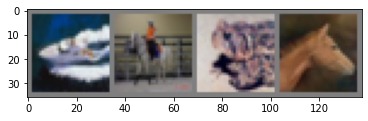

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')# gpu ile öğretiyoruz

# Hyper-parameters 
num_epochs = 5
batch_size = 4
learning_rate = 0.001


transform = transforms.Compose(
    [transforms.ToTensor(),#resimleri tensore çeviriyoruz
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: veri seti
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

In [2]:
#cnn ağımızın classı
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x


model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Epoch [1/5], Step [2000/12500], Loss: 2.3519
Epoch [1/5], Step [4000/12500], Loss: 2.3139
Epoch [1/5], Step [6000/12500], Loss: 2.3239
Epoch [1/5], Step [8000/12500], Loss: 2.2439
Epoch [1/5], Step [10000/12500], Loss: 2.1735
Epoch [1/5], Step [12000/12500], Loss: 2.1822
Epoch [2/5], Step [2000/12500], Loss: 2.0578
Epoch [2/5], Step [4000/12500], Loss: 1.9720
Epoch [2/5], Step [6000/12500], Loss: 2.0922
Epoch [2/5], Step [8000/12500], Loss: 1.3709
Epoch [2/5], Step [10000/12500], Loss: 1.4442
Epoch [2/5], Step [12000/12500], Loss: 1.3458
Epoch [3/5], Step [2000/12500], Loss: 1.6319
Epoch [3/5], Step [4000/12500], Loss: 1.1714
Epoch [3/5], Step [6000/12500], Loss: 1.3625
Epoch [3/5], Step [8000/12500], Loss: 1.5017
Epoch [3/5], Step [10000/12500], Loss: 2.3033
Epoch [3/5], Step [12000/12500], Loss: 1.1580
Epoch [4/5], Step [2000/12500], Loss: 2.1283
Epoch [4/5], Step [4000/12500], Loss: 1.4003
Epoch [4/5], Step [6000/12500], Loss: 2.1562
Epoch [4/5], Step [8000/12500], Loss: 1.4211
Epoc

# Part 14 - Transfer Learning

['ants', 'bees']


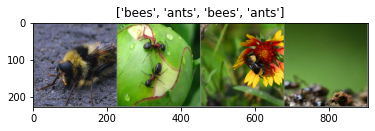

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

mean = np.array([0.5, 0.5, 0.5])
std = np.array([0.25, 0.25, 0.25])

data_transforms = {#elimizdeki verisetindeki veriler için data augmentation yaptık
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
}

data_dir = 'data/hymenoptera_data'# vverileri datadan çektik
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=0)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")#gpu ya geçirdik
print(class_names)


def imshow(inp, title):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    plt.title(title)
    plt.show()


inputs, classes = next(iter(dataloaders['train']))

out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [6]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    model.load_state_dict(best_model_wts)
    return model

In [7]:
#### Finetuning the convnet ####
# Önceden eğitilmiş bir model yükleyin ve son tamamen bağlı katmanı sıfırlayın.

model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features

model.fc = nn.Linear(num_ftrs, 2)#son katmanı 2 sınıf olarak ayarladık

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

model = train_model(model, criterion, optimizer, step_lr_scheduler, num_epochs=25)#modelimizi eğittik


#### ConvNet as fixed feature extractor ####
# Burada, son katman hariç tüm ağı dondurmamız gerekiyor.
# Değişkenlerin geriye doğru hesaplanmaması için parametreleri dondurmak için require_grad == False ayarlamamız gerekir ()

model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2) # tekrar son katmanın 2 sınıflı hale getirdik

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.6480 Acc: 0.6148
val Loss: 0.4978 Acc: 0.8039

Epoch 1/24
----------
train Loss: 0.5407 Acc: 0.7295
val Loss: 0.3714 Acc: 0.8824

Epoch 2/24
----------
train Loss: 0.4568 Acc: 0.8074
val Loss: 0.3126 Acc: 0.9020

Epoch 3/24
----------
train Loss: 0.3963 Acc: 0.8279
val Loss: 0.2528 Acc: 0.9216

Epoch 4/24
----------
train Loss: 0.4021 Acc: 0.8320
val Loss: 0.2774 Acc: 0.8954

Epoch 5/24
----------
train Loss: 0.4064 Acc: 0.8033
val Loss: 0.2178 Acc: 0.9477

Epoch 6/24
----------
train Loss: 0.4293 Acc: 0.8115
val Loss: 0.2163 Acc: 0.9412

Epoch 7/24
----------
train Loss: 0.3496 Acc: 0.8566
val Loss: 0.2165 Acc: 0.9477

Epoch 8/24
----------
train Loss: 0.2741 Acc: 0.8975
val Loss: 0.2012 Acc: 0.9412

Epoch 9/24
----------
train Loss: 0.3661 Acc: 0.8238
val Loss: 0.2145 Acc: 0.9477

Epoch 10/24
----------
train Loss: 0.3853 Acc: 0.8320
val Loss: 0.2184 Acc: 0.9346

Epoch 11/24
----------
train Loss: 0.3806 Acc: 0.8156
val Loss: 0.2108 Acc: 0.9216

Ep

# Part 15 - How To Use The TensorBoard

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

############## TENSORBOARD ########################
import sys
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter
# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/mnist1')

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 1
batch_size = 64
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

examples = iter(test_loader)
example_data, example_targets = examples.next()

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
#plt.show()

############## TENSORBOARD ########################
img_grid = torchvision.utils.make_grid(example_data)
writer.add_image('mnist_images', img_grid)
#writer.close()
#sys.exit()
###################################################

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

############## TENSORBOARD ########################
writer.add_graph(model, example_data.reshape(-1, 28*28))
#writer.close()
#sys.exit()
###################################################

# Train the model
running_loss = 0.0
running_correct = 0
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        running_correct += (predicted == labels).sum().item()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
            ############## TENSORBOARD ########################
            writer.add_scalar('training loss', running_loss / 100, epoch * n_total_steps + i)
            running_accuracy = running_correct / 100 / predicted.size(0)
            writer.add_scalar('accuracy', running_accuracy, epoch * n_total_steps + i)
            running_correct = 0
            running_loss = 0.0
            ###################################################

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
class_labels = []
class_preds = []
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        values, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        class_probs_batch = [F.softmax(output, dim=0) for output in outputs]

        class_preds.append(class_probs_batch)
        class_labels.append(predicted)

    # 10000, 10, and 10000, 1
    # stack concatenates tensors along a new dimension
    # cat concatenates tensors in the given dimension
    class_preds = torch.cat([torch.stack(batch) for batch in class_preds])
    class_labels = torch.cat(class_labels)

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

    ############## TENSORBOARD ########################
    classes = range(10)
    for i in classes:
        labels_i = class_labels == i
        preds_i = class_preds[:, i]
        writer.add_pr_curve(str(i), labels_i, preds_i, global_step=0)
        writer.close()
    ###################################################

# Part 16 - Saving and Loading Models

In [8]:
import torch
import torch.nn as nn

class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Model(n_input_features=6)

FILE = "model.pth"
torch.save(model, FILE)

loaded_model = torch.load(FILE)
loaded_model.eval()

Model(
  (linear): Linear(in_features=6, out_features=1, bias=True)
)

In [9]:
# save only state dict
FILE = "model.pth"
torch.save(model.state_dict(), FILE)

print(model.state_dict())
loaded_model = Model(n_input_features=6)
loaded_model.load_state_dict(torch.load(FILE)) # it takes the loaded dictionary, not the path file itself
loaded_model.eval()

print(loaded_model.state_dict())

OrderedDict([('linear.weight', tensor([[ 0.4067, -0.1300, -0.0636,  0.1585, -0.0171, -0.1257]])), ('linear.bias', tensor([-0.2345]))])
OrderedDict([('linear.weight', tensor([[ 0.4067, -0.1300, -0.0636,  0.1585, -0.0171, -0.1257]])), ('linear.bias', tensor([-0.2345]))])


In [10]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

checkpoint = {
"epoch": 90,
"model_state": model.state_dict(),
"optim_state": optimizer.state_dict()
}
print(optimizer.state_dict())
FILE = "checkpoint.pth"
torch.save(checkpoint, FILE)

model = Model(n_input_features=6)
optimizer = optimizer = torch.optim.SGD(model.parameters(), lr=0)

checkpoint = torch.load(FILE)
model.load_state_dict(checkpoint['model_state'])
optimizer.load_state_dict(checkpoint['optim_state'])
epoch = checkpoint['epoch']

model.eval()
# - or -
# model.train()

print(optimizer.state_dict())

{'state': {}, 'param_groups': [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'params': [0, 1]}]}
{'state': {}, 'param_groups': [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'params': [0, 1]}]}


In [12]:
# 1) Save on GPU, Load on CPU
device = torch.device("cuda")
model.to(device)
torch.save(model.state_dict(), PATH)
device = torch.device('cpu')
model = Model(n_input_features=6)
model.load_state_dict(torch.load(PATH, map_location=device))

# 2) Save on GPU, Load on GPU
device = torch.device("cuda")
model.to(device)
torch.save(model.state_dict(), PATH)
model = Model(n_input_features=6)
model.load_state_dict(torch.load(PATH))
model.to(device)

# 3) Save on CPU, Load on GPU
torch.save(model.state_dict(), PATH)
device = torch.device("cuda")
model = Model(n_input_features=6)
model.load_state_dict(torch.load(PATH, map_location="cuda:0"))  # Choose whatever GPU device number you want
model.to(device)

Model(
  (linear): Linear(in_features=6, out_features=1, bias=True)
)